## Project: Wrangle and Analyze Data

In [156]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

## Gather Data

### Twitter Archive (Local File)

In [157]:
#read the csv file
tw_df = pd.read_csv('twitter-archive-enhanced.csv')

### Image Prediction (URL)

In [158]:
# downloading image_predictions.tsv file programatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb')as f:
    f.write(response.content)

In [159]:
#read the csv file
p_pic = pd.read_csv('image_predictions.tsv', sep = "\t")

### Tweets (Twitter API)

In [160]:
# import tweepy

# consumer_key = 'x'
# consumer_secret = 'x'
# access_token = 'x'
# access_secret = 'x'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [161]:
tweet_ids = tw_df.tweet_id.values

In [162]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
all_fail = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(all_fail)

In [163]:
#saving data into required dataframe
twitter_df = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        twitter_df = twitter_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
twitter_df = twitter_df.reset_index(drop = True)

### Asses Data

In [164]:
#creates copy of original dataset
tw_df_clean = tw_df
p_pic_clean = p_pic
twitter_df_clean = twitter_df

In [165]:
tw_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [166]:
#provides info about the dataframe
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [167]:
#provide stats about the data
tw_df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [168]:
#provide unique elements in name column
tw_df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [169]:
#provide unique element in rating_numerator column
tw_df_clean.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [170]:
#set the width max so text is visible
pd.set_option('display.max_colwidth', -1)

#extract text with decimal ratings
tw_df_clean[tw_df_clean.text.str.contains(r'(\d+\.\d*\/\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [171]:
p_pic_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [172]:
#provide info about the dataframe
p_pic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [173]:
#provide stats about the dataframe
p_pic_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [174]:
twitter_df_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7671,36030
1,892177421306343426,5672,31083
2,891815181378084864,3759,23392
3,891689557279858688,7845,39314
4,891327558926688256,8443,37538
5,891087950875897856,2833,18920
6,890971913173991426,1843,10995
7,890729181411237888,17121,60717
8,890609185150312448,3895,26036
9,890240255349198849,6657,29743


In [175]:
#provides info about the dataframe
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null object
favorite_count    2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [176]:
#providex stats about the data frame
twitter_df_clean.describe()

,tweet_id,retweet_count,favorite_count
count,2331,2331,2331
unique,2331,1678,1997
top,707995814724026368,517,0
freq,1,6,163


## Issues

### Quality Issues


1. tw_df_clean has columns to be removed which are not useful for analysis like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

2. tw_df_clean has tweet_id which needs to be changed to string, timestamp to todate.

3. p_pic_clean has tweet_id which needs to be changed to string.

4. tw_df_clean has retweets rows which needs to be removed as we do not need retweets data.

5. tw_df_clean name column has various names which are not capitalize which needs to be replaced with Nan.

6. tw_df_clean name column has various names which are one one letter which needs to be replaced with Nan.

7. tw_df_clean has numerator ratings which does not match the text which needs to be corrected.

8. twitter_df_clean retweet_count and favorite_count has to be changed to int.

9. td_df_clean has source which is not readable which needs to be extracted.

### Tideness Issues

1. tw_df_clean Melting the columns doggo,pupper, puppo, floofer to one row.
2. p_pic_clean Reduce the number of columns p, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3 to two columns dog_breed and conf_test.
3. p_pic_clean The dog_breed column created above has name which are not capitalized and needs format change
4. Extra columns which to be removed like p, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3 after converting it into two columns 
5. Merging all the three dataframes into one.

## Clean

### Cleaning 1 (Issue 2)

**Aim**
To change tweet_id to string, timestamp to todate.

**Code**

In [177]:
#convert the tweet_id to string
tw_df_clean.tweet_id = tw_df_clean.tweet_id.astype(str) 

In [178]:
#convert the timestamp to datetime
tw_df_clean.timestamp = pd.to_datetime(tw_df_clean.timestamp) 

**Test**

In [179]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Cleaning 2 (Issue 3)

**Aim**
To change tweet_id to string.

**Code**

In [180]:
#converts to string
p_pic_clean.tweet_id = p_pic.tweet_id.astype(str) 

**Test**

In [181]:
p_pic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Cleaning 3 (Issue 8)

**Aim**
To change retweet_count, favorite_count to int.

**Code**

In [182]:
#converts to int
twitter_df_clean[['retweet_count','favorite_count']] = twitter_df_clean[['retweet_count','favorite_count']].astype(int) 

**Test**

In [183]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Cleaning 4 (Issue 5)

**Aim** To replace the elements in the name column which has various names whose first letter is not capitalize.

**Code**

In [184]:
#replaced none with Nan and replaced lower case names with Nan
low_cas = tw_df_clean.name.str.islower()
tw_df_clean.loc[low_cas,'name'] = np.nan
tw_df_clean.name.replace('None',np.nan, inplace=True)

**Test**

In [185]:
#provide counts with lower 
tw_df_clean.name.str.islower().value_counts()

False    1502
Name: name, dtype: int64

### Cleaning 5 (Issue 6)

**Aim** To replace the elements in the name column which has various names whose length is one letter like O which is nota name.

**Code**

In [186]:
#replace '0' with Nan
tw_df_clean.name = tw_df_clean.name.replace('O',np.nan)

**Test**

In [187]:
#check if it is replaced
tw_df_clean.query('name=="O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Cleaning 6 (Issue 4)

**Aim** To remove retweets rows as we do not need retweets data.

**Code**

In [188]:
#removes the row with non null retweets
tw_df_clean = tw_df_clean[tw_df_clean.retweeted_status_id.isnull()]

In [189]:
#removes the row with non null retweets
tw_df_clean =tw_df_clean[tw_df_clean.in_reply_to_status_id.isnull()]

**Test**

In [190]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1389 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

### Cleaning 7 (Issue 1)

**Aim** To remove columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp which are not useful for the analysis.

**Code**

In [191]:
#drops the mentioned columns
tw_df_clean = tw_df_clean.drop(['retweeted_status_id',
                                'retweeted_status_user_id',
                                'retweeted_status_timestamp',
                                'in_reply_to_status_id',
                                'in_reply_to_user_id'], axis=1) 

**Test**

In [192]:
list(tw_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Cleaning 8 (Issue 8)

**Aim** To change the ratings in the rating_numerator as it doesn't match the text which is in decimals.

**Code**

In [193]:
#provide the whole text 
pd.set_option('display.max_colwidth', -1)

#variable that contain index of rows with decimals in text
index_rat = tw_df_clean[tw_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")].index

#contains rows with decimals in text
tw_df_clean[tw_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,None,None,None,None


In [194]:
#location of text with index
rat_col = tw_df_clean.loc[index_rat,'text']

#lists the text
rat_col = list(rat_col)

In [195]:
#loop for replacing decimal to rating_numerator
for i in rat_col:
    idx = tw_df_clean.text == i
    num = 'rating_numerator'
    dem = 'rating_denominator'
    tw_df_clean.loc[idx,num]=re.findall(r'\d+\.\d+', i)
    tw_df_clean.loc[idx,dem]=10   

**Test**

In [196]:
#checks if it is replaced
tw_df_clean[tw_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,None,None,None,None


### Tidiness 1 (Issue  1)

**Aim** To melt the columns doggo, pupper, floofer, puppo to one column names dog_size

**Code**

In [197]:
#merge the columns
tw_df_clean = pd.melt(tw_df_clean, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
                      var_name = 'size', value_name = 'dog_size')

In [198]:
#drops the columns
tw_df_clean = tw_df_clean.drop(['size'],axis=1) 

In [199]:
#drop duplicates
tw_df_clean = tw_df_clean.sort_values('dog_size').drop_duplicates(subset='tweet_id',keep='last')

**Test**

In [200]:
#provides value count of above variable
tw_df_clean.dog_size.value_counts()

None       1761
pupper     230 
doggo      72  
puppo      24  
floofer    10  
Name: dog_size, dtype: int64

In [201]:
list(tw_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_size']

### Tidiness 2 (Issue  5)

**Aim** Merge all the dataframe into one

**Code**

In [202]:
#merges two dataframe
tw_df_clean = pd.merge(tw_df_clean,p_pic, on='tweet_id', how='inner')

In [203]:
#merge two dataframe
tw_df_clean = pd.merge(tw_df_clean,twitter_df_clean, on='tweet_id', how='inner')

**Test**

In [204]:
tw_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,...,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,213,447
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,NaN,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,...,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,81,295
2,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,NaN,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,...,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,225,428
3,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,NaN,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,...,0.980815,False,drake,0.006918,False,hen,0.005255,False,546,746
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,...,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,84,298


### Tidiness 3 (Issue  2)

**Aim** To reduce the number of columns p, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3 to two columns dog_breed and conf_test.

**Code**

In [205]:
#function to reduce columns from 8 to 2
conf_test=[]
dog_breed= []

def pic(tw_df_clean):
    if tw_df_clean['p1_dog'] == True:
        dog_breed.append(tw_df_clean['p1'])
        conf_test.append(tw_df_clean['p1_conf'])
    elif tw_df_clean['p2_dog'] == True:
        dog_breed.append(tw_df_clean['p2'])
        conf_test.append(tw_df_clean['p2_conf'])
    elif tw_df_clean['p3_dog'] == True:
        dog_breed.append(tw_df_clean['p3'])
        conf_test.append(tw_df_clean['p3_conf'])
    else:
        dog_breed.append('None')
        conf_test.append('None')

tw_df_clean.apply(pic,axis=1)

tw_df_clean['conf_test'] = conf_test
tw_df_clean['dog_breed'] = dog_breed 

In [206]:
tw_df_clean = tw_df_clean.query('dog_breed!="None"')

**Test**

In [207]:
list(tw_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_size',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'conf_test',
 'dog_breed']

### Tidiness 4 (Issue 4 )

**Aim** To drop the columns p, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3 as they are now converted to two columns dog_breed and conf_test in the last step

**Code**

In [208]:
#drops the columns
tw_df_clean = tw_df_clean.drop([ 'img_num','p1',
                     'p1_conf','p1_dog',
                     'p2','p2_conf',
                     'p2_dog','p3',
                     'p3_conf','p3_dog'],axis=1)

**Test**

In [209]:
list(tw_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_size',
 'jpg_url',
 'retweet_count',
 'favorite_count',
 'conf_test',
 'dog_breed']

### Tidiness 5 (Issue 3 )

**Aim** To capitalize first letter of each word in the dog_breed column to make it look tidy.

**Code**

In [210]:
#replace _ with ' '
tw_df_clean.dog_breed = tw_df_clean.dog_breed.str.replace('_',' ')

In [211]:
#capitalize all first letter of each word
tw_df_clean.dog_breed = tw_df_clean.dog_breed.apply(lambda x: string.capwords(x))

**Test**

In [212]:
tw_df_clean.dog_breed.unique()

array(['Saint Bernard', 'Rottweiler', 'Labrador Retriever',
       'Tibetan Terrier', 'Toy Poodle', 'Borzoi', 'Chihuahua', 'Beagle',
       'Italian Greyhound', 'Chesapeake Bay Retriever', 'Papillon',
       'Golden Retriever', 'Yorkshire Terrier', 'Pomeranian', 'Kuvasz',
       'West Highland White Terrier', 'Dalmatian', 'Flat-coated Retriever',
       'Miniature Pinscher', 'Pembroke', 'Siberian Husky',
       'Miniature Poodle', 'English Setter', 'Miniature Schnauzer',
       'Maltese Dog', 'Airedale', 'Giant Schnauzer',
       'Soft-coated Wheaten Terrier', 'Vizsla', 'Malamute',
       'Norwegian Elkhound', 'Boxer', 'Blenheim Spaniel', 'Chow',
       'German Shepherd', 'Border Collie', 'Ibizan Hound', 'Gordon Setter',
       'Walker Hound', 'Pug', 'Bloodhound', 'Lhasa', 'Newfoundland',
       'Black-and-tan Coonhound', 'Toy Terrier', 'Irish Terrier',
       'Curly-coated Retriever', 'Bernese Mountain Dog', 'Redbone',
       'Rhodesian Ridgeback', 'Cocker Spaniel', 'Saluki', 'Basset'

### Cleaning 9 (Issue 9 )

**Aim** To extract the source of the tweet using regex

**Code**

In [213]:
#checks for unique elements
tw_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1629
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     22  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    8   
Name: source, dtype: int64

In [214]:
#extract needed string from the source
tw_df_clean.source = tw_df_clean.source.str.extract(r'([A-Za-z]+\s[A-Za-z]+\s[a-zA-Z]+)')

In [215]:
#checks for unique elements
tw_df_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', nan], dtype=object)

In [216]:
#replace Nan with TweetDeck
tw_df_clean.source = tw_df_clean.source.replace(np.nan,'TweetDeck')

In [217]:
#check for counts
tw_df_clean.source.value_counts()

Twitter for iPhone    1629
Twitter Web Client    22  
TweetDeck             8   
Name: source, dtype: int64

## Store

Storing cleaned dataframe to a csv file.

In [218]:
#stores data to csv
tw_df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Visualizations

In [219]:
tw_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size,jpg_url,retweet_count,favorite_count,conf_test,dog_breed
489,701214700881756160,2016-02-21 01:19:47,Twitter for iPhone,"I'm not sure what's happening here, but it's pretty spectacular. 12/10 for both https://t.co/JKXh0NbBNL",https://twitter.com/dog_rates/status/701214700881756160/photo/1,12,10,NaN,None,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,5054,12095,0.615163,Chihuahua
414,710272297844797440,2016-03-17 01:11:26,Twitter for iPhone,We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2,https://twitter.com/dog_rates/status/710272297844797440/photo/1,11,10,NaN,None,https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg,1238,4490,0.586307,Old English Sheepdog
113,666421158376562688,2015-11-17 01:02:40,Twitter for iPhone,*internally screaming* 12/10 https://t.co/YMcrXC2Y6R,https://twitter.com/dog_rates/status/666421158376562688/photo/1,12,10,NaN,None,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,105,298,0.906777,Blenheim Spaniel
1645,759197388317847553,2016-07-30 01:22:17,Twitter for iPhone,This is Luna. She's just heckin precious af I have nothing else to say. 12/10 https://t.co/gQH2mmKIJW,"https://twitter.com/dog_rates/status/759197388317847553/photo/1,https://twitter.com/dog_rates/status/759197388317847553/photo/1,https://twitter.com/dog_rates/status/759197388317847553/photo/1",12,10,Luna,None,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,1948,6083,0.511341,Kuvasz
215,691483041324204033,2016-01-25 04:49:38,Twitter for iPhone,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1",5,10,NaN,None,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,561,2374,0.886232,Bloodhound


## Which tweet is highest tweeted?

In [220]:
#highest tweeted tweet
tw_df_clean.sort_values('retweet_count',ascending=False)[['tweet_id','retweet_count','jpg_url']].head()

,tweet_id,retweet_count,jpg_url
1720,744234799360020481,77426,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
1674,739238157791694849,57446,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg
1035,807106840509214720,56410,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
1948,822872901745569793,43594,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
177,879415818425184262,40434,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg


We can see the top 5 retweeted tweets along with the jpg url for reference.

## Which are the lowest retweeted tweets?

In [221]:
#lowest tweeted tweet
tw_df_clean.sort_values('retweet_count',ascending=True)[['tweet_id','retweet_count','jpg_url']].head()

,tweet_id,retweet_count,jpg_url
98,666102155909144576,11,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
118,666447344410484738,18,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg
110,666407126856765440,32,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg
777,670676092097810432,39,https://pbs.twimg.com/media/CU64WOlWcAA37TV.jpg
127,666049248165822465,40,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg


We can see the bottom 5 retweeted tweets along with the jpg url for reference.

## Which are the most favorite tweet?

In [222]:
#most favorite tweet
tw_df_clean.sort_values('favorite_count',ascending=False)[['tweet_id','retweet_count','jpg_url']].head()

,tweet_id,retweet_count,jpg_url
1720,744234799360020481,77426,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
1948,822872901745569793,43594,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
1035,807106840509214720,56410,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg
1932,866450705531457537,32793,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
1674,739238157791694849,57446,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg


The 5 most favorited tweets are mentioned above with the jpg_url for reference.

## Which are the least favorited tweet?

In [223]:
#least favorite tweet
tw_df_clean.sort_values('favorite_count',ascending=True)[['tweet_id','retweet_count','jpg_url']].head()

,tweet_id,retweet_count,jpg_url
98,666102155909144576,11,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
127,666049248165822465,40,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
118,666447344410484738,18,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg
110,666407126856765440,32,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg
95,666082916733198337,41,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg


The 5 least favorited tweets are mentioned above with jpg_url for reference.

## Which is the most popular source used to access Twitter in this database?

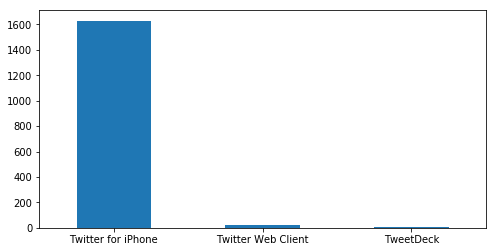

In [224]:
#type of source used
plt.figure(figsize=(8,4))
client = tw_df_clean.source.value_counts()
client.plot(kind='bar',color=sb.color_palette()[0])
plt.xticks(rotation=None);

From the above graph, we can see that the most of the user use Iphone to access twitter while the lowest is TweetDeck. There is a drastic difference between them.

## Which breed is found most?

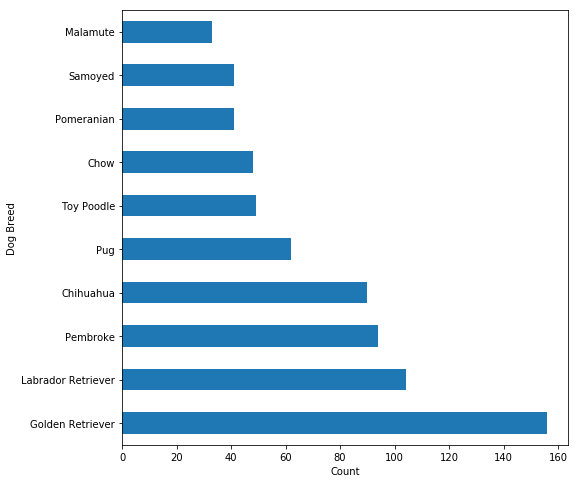

In [225]:
top_breed = tw_df_clean.dog_breed.value_counts().head(10)
plt.figure(figsize=(8,8))
top_breed.plot(kind='barh',color=sb.color_palette()[0])
plt.xlabel('Count');
plt.ylabel('Dog Breed');

We can see that the most popular dog breed is Golden Retreiver followed by Labrador Retriever, Pembroke, Chihuahua, Pug and so on. These are the five most popular breed on Twitter and on the internet.

## Which size of dog is found most?

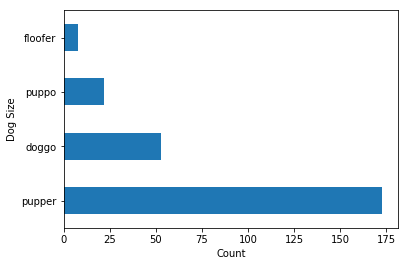

In [226]:
dog_type = tw_df_clean.dog_size.value_counts()[1:]
x = tw_df_clean.dog_size.value_counts().index[1:]
dog_type.plot(kind='barh',color=sb.color_palette()[0])
plt.xlabel('Count');
plt.ylabel('Dog Size');

From the graph we can see pupper is found maximum, followed by doggo, puppo and floofer. This means pupper size of dog is found the most.

## Which name is common among dogs?

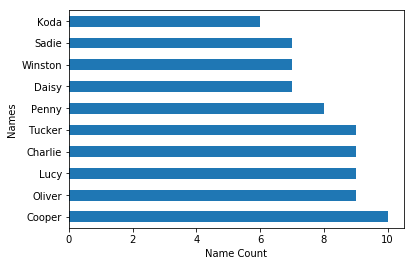

In [227]:
dog_name = tw_df_clean.name.value_counts().head(10)
dog_name.plot(kind='barh',color=sb.color_palette()[0])
plt.xlabel('Name Count');
plt.ylabel('Names');

From the above graph, we can say that Cooper is the most used name for dogs followed by Charlie, Oliver, Lucy and Tucker. These are the top 5 most common dog names.

## Conclusion


From the data we can see that the most popular source of accessing twitter is Iphone, this can help twitter to better focus on software development of Iphone to make it efficient to reduce lags. The data about the most retweet and favorited can be used by WeRateDogs admin to determine which is most liked by users so they can provide content of similar type. Moving forward, the most popular dog breed based on image prediction is golden retriever, which means the the page is uploading most photos of golden retriever. The most common dog type is a 'pupper' on this page. The page can try to change the content to see if they see increase in retweet or favorite which can help them increasing their following. Last but not the least, most common name used is Cooper.